# Visualization of results

In [56]:
# Data manipulation
import pandas as pd # data manipulation and dataframes
import numpy as np # arrays manipulation and mathematical operations

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime
from datetime import datetime

# Te quiero demasiado
from tqdm import tqdm

In [161]:
# Reads csvs
initial = pd.read_csv('../eda/initial.csv', index_col = 0)
scraped = pd.read_csv('../eda/scraped.csv', index_col = 0)

frames = [initial, scraped]
concatenation = pd.concat(frames)

unique_dates = concatenation['insert_date'].unique().tolist();
unique_categories = concatenation['category'].unique().tolist();

In [136]:
mean_price_20_21 = {'dates': [], 'mean_prices': []}

for d in tqdm(unique_dates):
    mean_price_20_21['dates'].append(d)
    mean_price_20_21['mean_prices'].append(initial[initial['insert_date'] == d]['price'].mean())

100%|██████████| 532/532 [01:37<00:00,  5.44it/s]


In [157]:
sum(initial['price']) / len(initial['price'])


nan

In [162]:
initial.isnull().sum()

url                   0
supermarket           0
category              0
name                  0
price                 6
reference_price       6
reference_unit     5480
insert_date           0
dtype: int64

In [163]:
initial.dropna(axis=0, inplace=True)

In [164]:
initial.isnull().sum()

url                0
supermarket        0
category           0
name               0
price              0
reference_price    0
reference_unit     0
insert_date        0
dtype: int64

In [165]:
sum(initial['price']) / len(initial['price'])

3.390814585226003

In [152]:
sum(scraped['price']) / len(scraped['price'])

3.3987446878065395

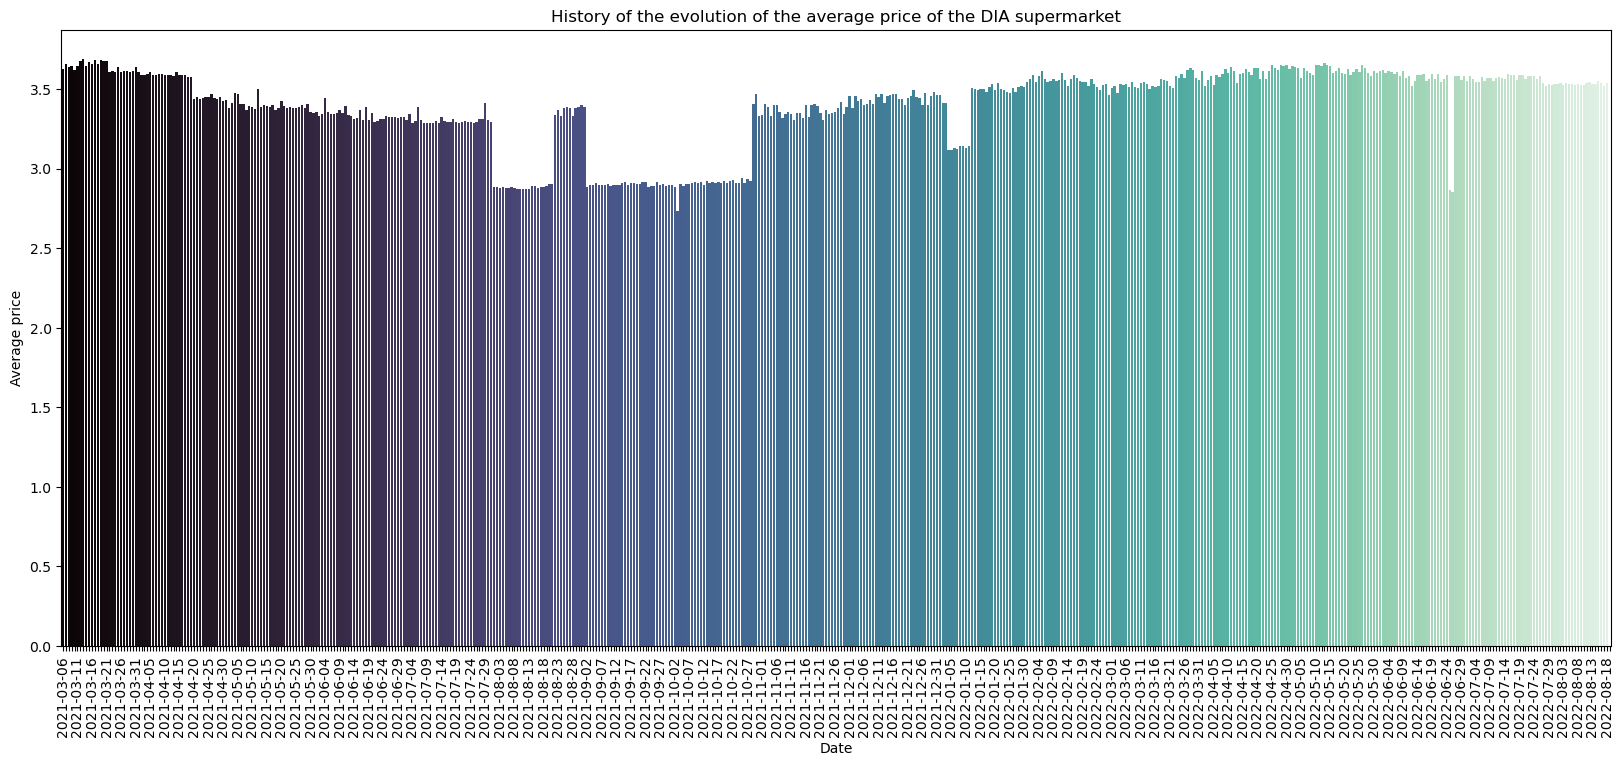

In [139]:
plt.figure(figsize =(20,8))

bar_plot = sns.barplot(x = mean_price_20_21['dates'], y = mean_price_20_21['mean_prices'], palette= "mako")

plt.title('History of the evolution of the average price of the DIA supermarket')
plt.xlabel('Date')
plt.ylabel('Average price')
plt.xticks(rotation=90);

plt.axhline(sum(mean_price_20_21['mean_prices']) / len(mean_price_20_21['mean_prices']), color='red', linewidth=2, linestyle='dotted')


for index, label in enumerate(bar_plot.get_xticklabels()):
   if index % 5 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
plt.show()

In [60]:
mean_price_by_dates = {'dates': [], 'mean_prices': []}

for d in tqdm(unique_dates):
    mean_price_by_dates['dates'].append(d)
    mean_price_by_dates['mean_prices'].append(concatenation[concatenation['insert_date'] == d]['price'].mean())

100%|██████████| 532/532 [01:31<00:00,  5.81it/s]


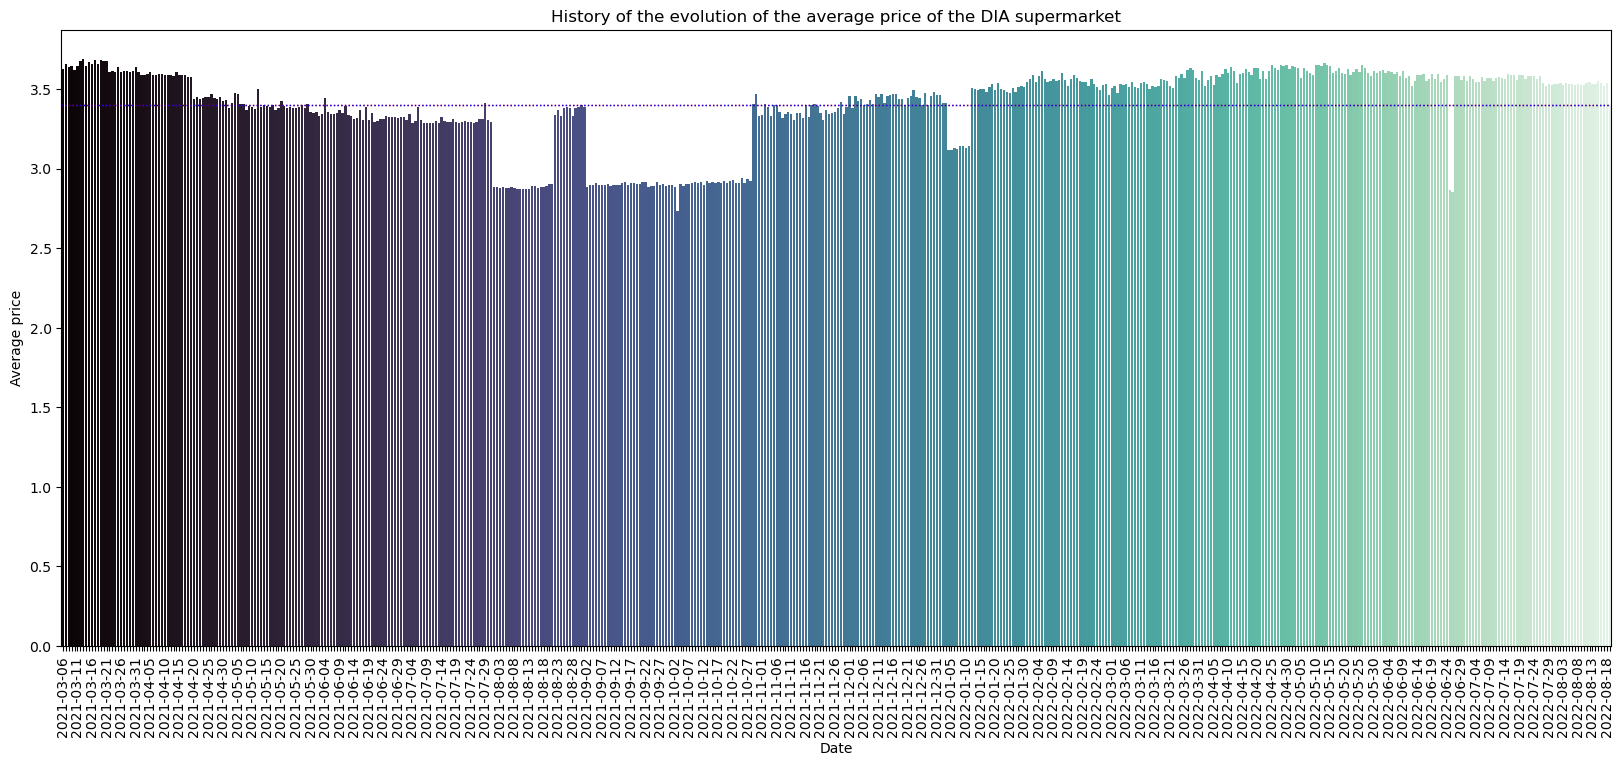

In [140]:
plt.figure(figsize =(20,8))

bar_plot = sns.barplot(x = mean_price_by_dates['dates'], y = mean_price_by_dates['mean_prices'], palette= "mako")

plt.title('History of the evolution of the average price of the DIA supermarket')
plt.xlabel('Date')
plt.ylabel('Average price')
plt.xticks(rotation=90);

plt.axhline(sum(mean_price_by_dates['mean_prices']) / len(mean_price_by_dates['mean_prices']), color='red', linewidth=1, linestyle='dotted')
plt.axhline(sum(scraped['price']) / len(scraped['price']), color='blue', linewidth=1, linestyle='dotted')

for index, label in enumerate(bar_plot.get_xticklabels()):
   if index % 5 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
plt.show()

In [134]:
media = sum(mean_price_by_dates['mean_prices']) / len(mean_price_by_dates['mean_prices'])
media

3.3986731892700934

In [167]:
unique_categories = initial['category'].unique()

mean_price_by_categories = {'categories': [], 'mean_prices': []}

for c in tqdm(unique_categories):
    mean_price_by_categories['categories'].append(c)
    mean_price_by_categories['mean_prices'].append(initial[initial['category'] == c]['price'].mean())


100%|██████████| 26/26 [00:04<00:00,  5.93it/s]


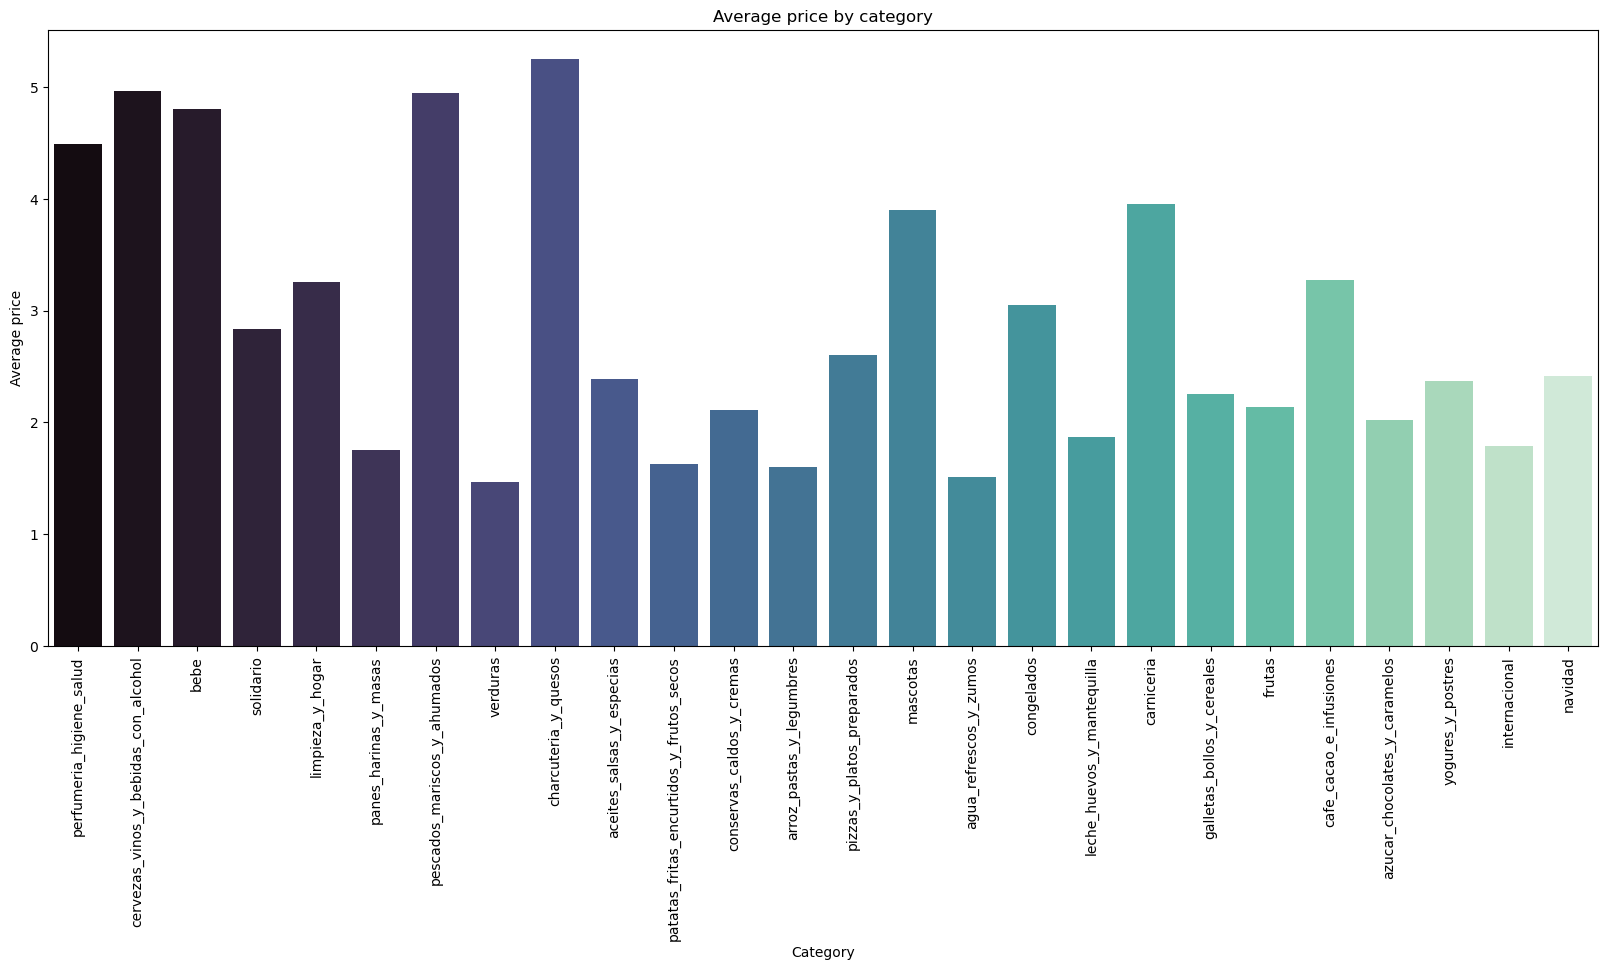

In [168]:
plt.figure(figsize =(20,8))

sns.barplot(x = mean_price_by_categories['categories'], y = mean_price_by_categories['mean_prices'], palette= "mako")

plt.title('Average price by category')
plt.xlabel('Category')
plt.ylabel('Average price')
plt.xticks(rotation=90);

In [169]:
mean_price_by_categories2 = {'categories': [], 'mean_prices': []}

for c in tqdm(unique_categories):
    mean_price_by_categories2['categories'].append(c)
    mean_price_by_categories2['mean_prices'].append(scraped[scraped['category'] == c]['price'].mean())

100%|██████████| 26/26 [00:00<00:00, 938.15it/s]


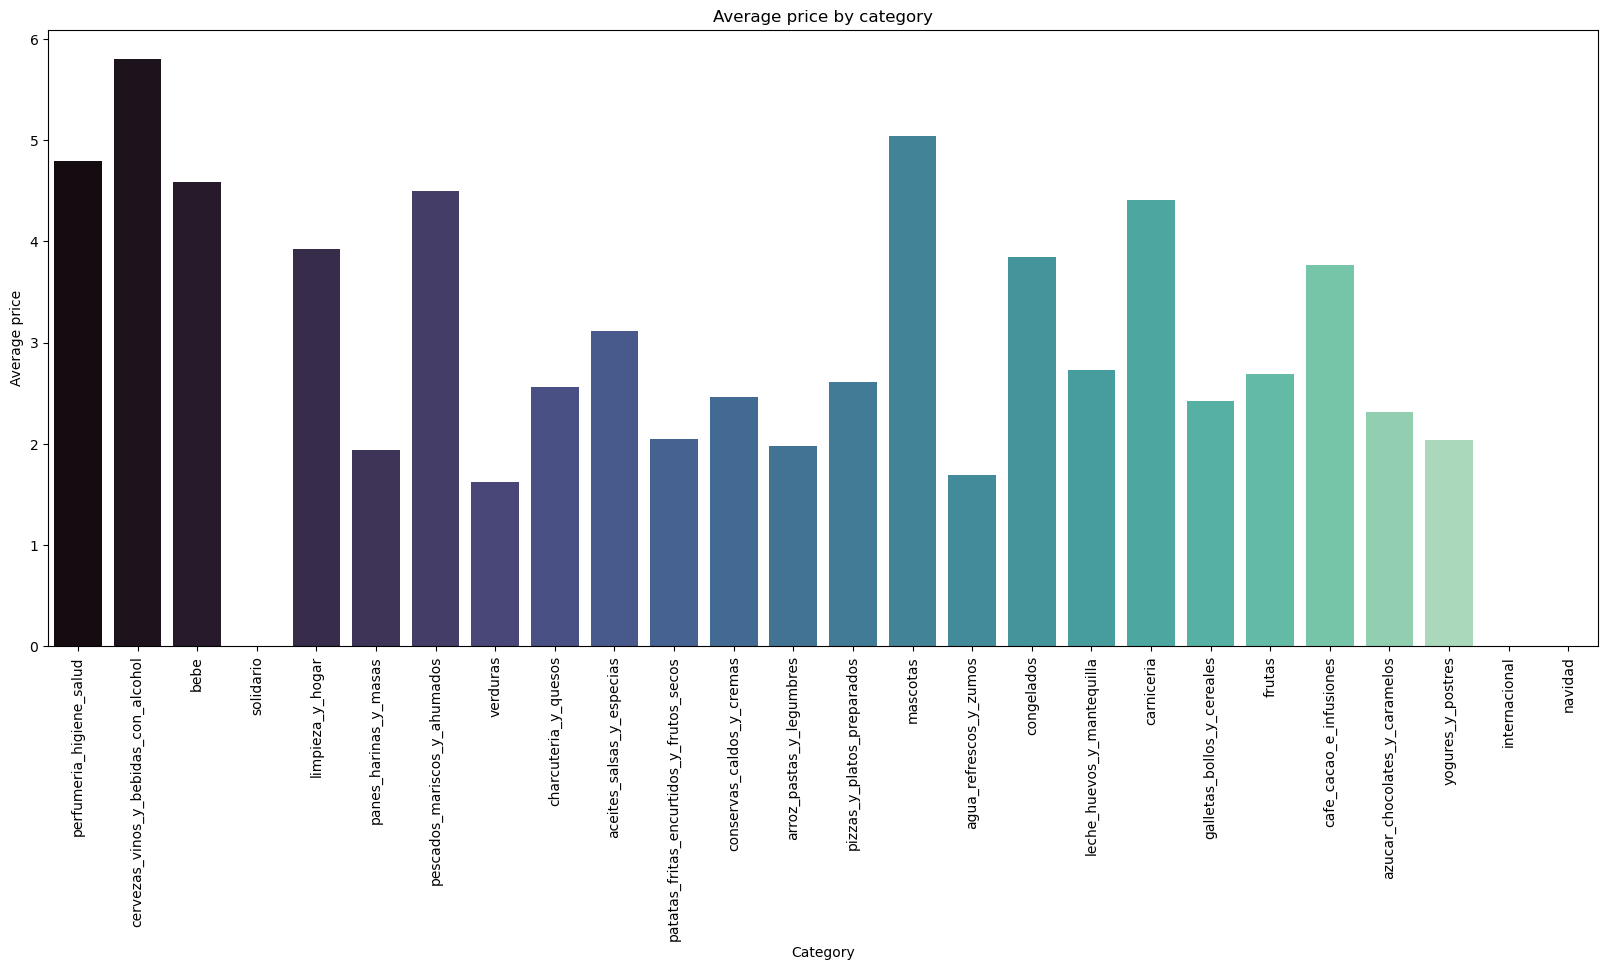

In [170]:
plt.figure(figsize =(20,8))

sns.barplot(x = mean_price_by_categories2['categories'], y = mean_price_by_categories2['mean_prices'], palette= "mako")

plt.title('Average price by category')
plt.xlabel('Category')
plt.ylabel('Average price')
plt.xticks(rotation=90);

In [91]:
unique_categories


array(['perfumeria_higiene_salud', 'cervezas_vinos_y_bebidas_con_alcohol',
       'bebe', 'solidario', 'limpieza_y_hogar', 'panes_harinas_y_masas',
       'pescados_mariscos_y_ahumados', 'verduras', 'charcuteria_y_quesos',
       'aceites_salsas_y_especias',
       'patatas_fritas_encurtidos_y_frutos_secos',
       'conservas_caldos_y_cremas', 'arroz_pastas_y_legumbres',
       'pizzas_y_platos_preparados', 'mascotas', 'agua_refrescos_y_zumos',
       'congelados', 'leche_huevos_y_mantequilla', 'carniceria',
       'galletas_bollos_y_cereales', 'frutas', 'cafe_cacao_e_infusiones',
       'azucar_chocolates_y_caramelos', 'yogures_y_postres',
       'internacional', 'navidad'], dtype=object)

In [115]:
price_evolution_expensive_categories = {'dates': [], 'mean_prices': []}
expensive_categories = ['perfumeria_higiene_salud', 'cervezas_vinos_y_bebidas_con_alcohol', 'bebe', 'pescados_mariscos_y_ahumados', 'charcuteria_y_quesos']


for d in tqdm(unique_dates):
    price_evolution_expensive_categories['dates'].append(d)
    price_evolution_expensive_categories['mean_prices'].append(concatenation[(concatenation['insert_date'] == d) & (concatenation['category'] == 'perfumeria_higiene_salud')]['price'].mean())

100%|██████████| 532/532 [02:58<00:00,  2.99it/s]


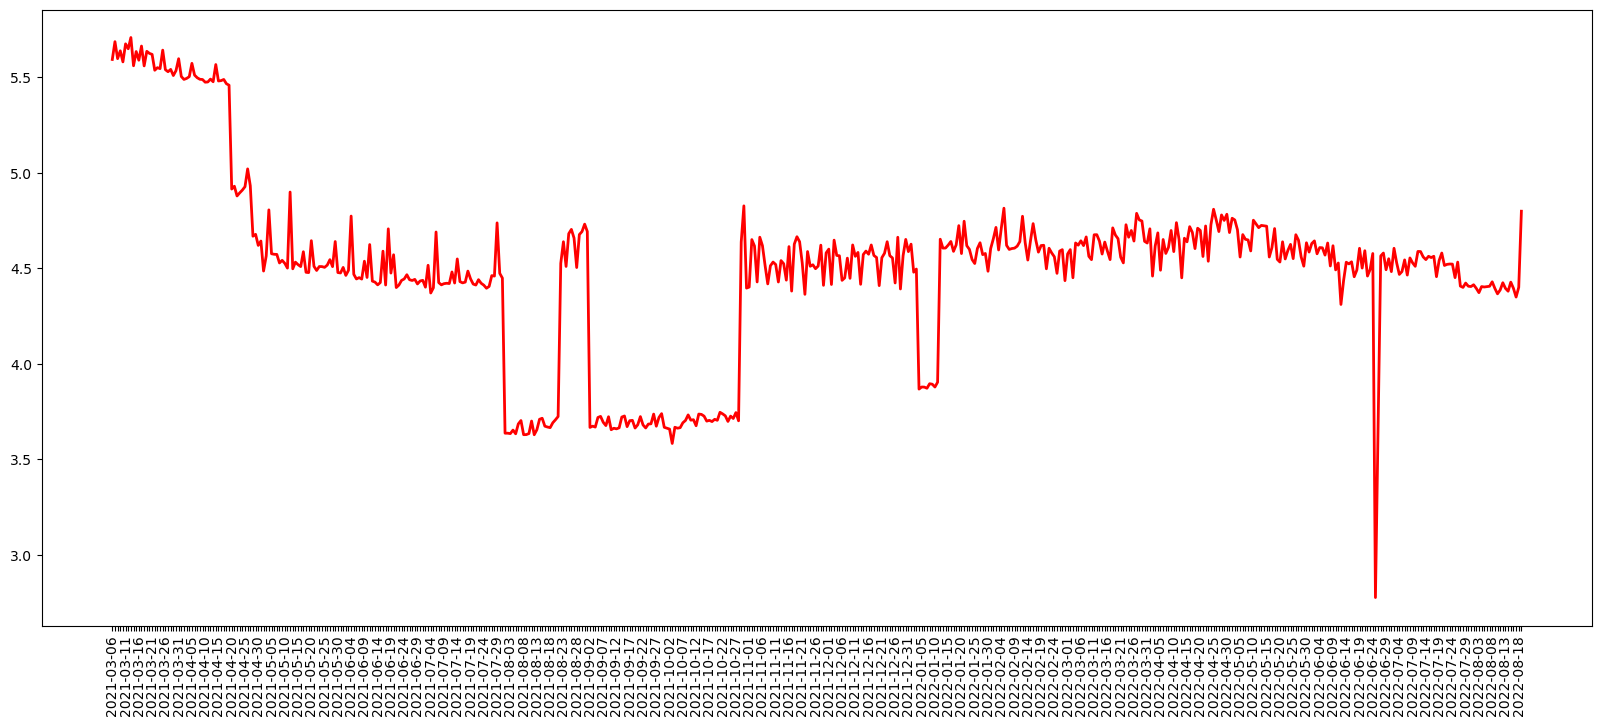

In [125]:
plt.figure(figsize =(20,8))


line_plot = sns.lineplot(x = price_evolution_expensive_categories['dates'], 
             y = price_evolution_expensive_categories['mean_prices'], 
             linewidth = 2, 
             color = "red")

plt.xticks(rotation=90);

for index, label in enumerate(line_plot.get_xticklabels()):
   if index % 5 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
plt.show()